# Black-Scholes Model for Option Pricing

In the year 1973, Mryon Scholes and Fischer Black published a paper that revolutionized option pricing and laid the foundations of Quantitative Finance. Let us look at their modelling assumptions and their result without proof.

## Modelling Assumptions

 - Interest rate is known and constant through time.
 - The stock follows a random walk in continuous time, the stock price paths follow a log-normal distribution.
 - Volatility is constant.
 - The option can only be exercised at expiration i.e. it is a European type option.
 - No transaction costs i.e. fees on shorting selling etc.
 - Fractional trading is possible.

## BS Formula

$$\text{Call} = N(d_1)S_0e^{-qT} - N(d_2)Ke^{-rT}$$
$$\text{Put} =  N(-d_2)Ke^{-rT} - N(-d_1)S_0e^{-qT}$$
where
$$d_1 = \dfrac{\ln\left(\dfrac{S}{K}\right) + \left(r-q+\dfrac{\sigma^2}{2}\right)T}{\sigma \sqrt{T}}$$
$$d_2 = d_1 - \sigma \sqrt{T}$$
$$N(x) = \int_{-\infty}^{x} \frac{e^{-x^2/2}}{\sqrt{2\pi}}$$

 - S is the current stock price
 - K is the strike price
 - r is the risk free rate
 - q is the dividend
 - T is the time until expiration
 - $\sigma$ is the annualized volatility of the asset's returns

In [1]:
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt

N = norm.cdf

def BS_CALL(S, K, T, r, q, sigma):
    d1 = (np.log(S/K) + (r - q + sigma**2/2)*T) / (sigma*np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)
    return S * np.exp(-q*T) * N(d1) - K * np.exp(-r*T)* N(d2)

def BS_PUT(S, K, T, r, q, sigma):
    d1 = (np.log(S/K) + (r - q + sigma**2/2)*T) / (sigma*np.sqrt(T))
    d2 = d1 - sigma* np.sqrt(T)
    return K*np.exp(-r*T)*N(-d2) - S*np.exp(-q*T)*N(-d1)

### Effect of S on option value

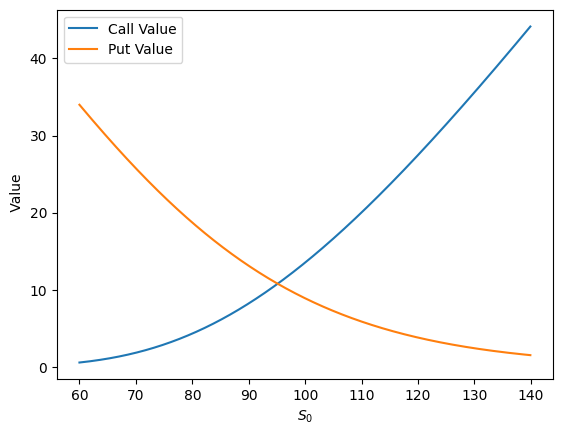

In [2]:
K = 100
r = 0.1
T = 1
q = 0.05
sigma = 0.3

S = np.arange(60,140,0.1)

calls = [BS_CALL(s, K, T, r, q, sigma) for s in S]
puts = [BS_PUT(s, K, T, r, q, sigma) for s in S]
plt.plot(S, calls, label='Call Value')
plt.plot(S, puts, label='Put Value')
plt.xlabel('$S_0$')
plt.ylabel(' Value')
plt.legend()

### Effect of $\sigma$ on option value

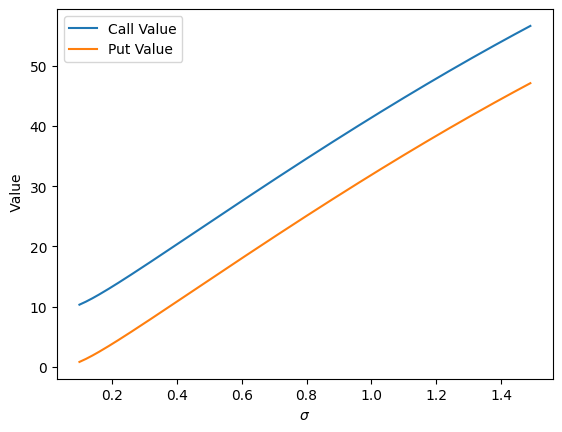

In [3]:
K = 100
r = 0.1
T = 1
q = 0
Sigmas = np.arange(0.1, 1.5, 0.01)
S = 100

calls = [BS_CALL(S, K, T, r, q, sig) for sig in Sigmas]
puts = [BS_PUT(S, K, T, r, q, sig) for sig in Sigmas]
plt.plot(Sigmas, calls, label='Call Value')
plt.plot(Sigmas, puts, label='Put Value')
plt.xlabel('$\sigma$')
plt.ylabel(' Value')
plt.legend()

### Effect of Time on option value

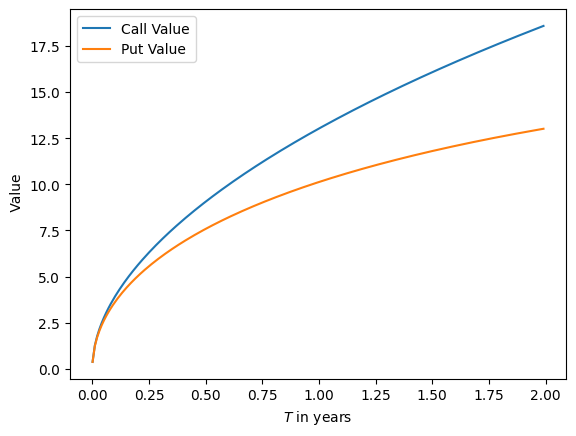

In [4]:
K = 100
r = 0.05
q = 0.02
T = np.arange(0.001, 2, 0.01)
sigma = 0.3
S = 100

calls = [BS_CALL(S, K, t, r, q, sigma) for t in T]
puts = [BS_PUT(S, K, t, r, q, sigma) for t in T]
plt.plot(T, calls, label='Call Value')
plt.plot(T, puts, label='Put Value')
plt.xlabel('$T$ in years')
plt.ylabel(' Value')
plt.legend()

## Drawbacks of Black-Scholes

This model assumes that the volatility of a stock price is constant. However, this might not be true. The script below calculates the rolling standard deviation for APPLE over approximately 10 years. Notice that volatility is in no way stable.

[*********************100%***********************]  1 of 1 completed


Text(0.5, 1.0, 'AAPL Rolling Volatility')

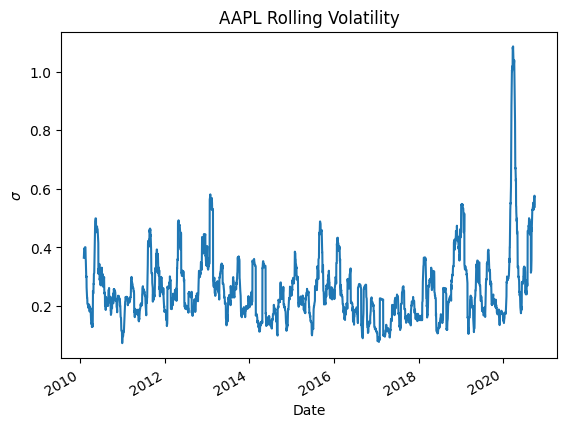

In [5]:
import pandas_datareader.data as web
import pandas as pd
import datetime as dt
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf

yf.pdr_override()

start = dt.datetime(2010,1,1)    
end =dt.datetime(2020,10,1) 
symbol = 'AAPL' ###using Apple as an example
data = web.get_data_yahoo(symbol, start, end)
data['change'] = data['Adj Close'].pct_change()
data['rolling_sigma'] = data['change'].rolling(20).std() * np.sqrt(255)


data.rolling_sigma.plot()
plt.ylabel('$\sigma$')
plt.title('AAPL Rolling Volatility')